In [1]:
%pylab inline
font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)
figsize(6, 6)

from sympy import Symbol, symbols, Function, Derivative, latex, exp, I, solve, lambdify, cos, sin
from IPython.display import Math, display
import numpy as np
from scipy import constants

from Electromagnetics.FourierBlochND import *
from Electromagnetics.SymExprTree import *


t, x, y = symbols('t x y')
E, J = symbols('E J')

omega, kx, ky, c = symbols(r'\omega k_x k_y c')
eps_r = symbols(r'\epsilon_r', real=True)
mu_0, eps_0 = symbols(r'\mu_0 \epsilon_0', real=True)

gamma, n_e, e, m_e, omega_p = symbols(r'\gamma n_e e m_e omega_p')
n_0, n_1 = symbols('n_0 n_1')
omega_m, kx_m, ky_m = symbols(r'\omega_m k_{xm} k_{ym}')

EQ_E = Derivative(E, x, 2) + Derivative(E, y, 2) - mu_0*eps_0*eps_r*Derivative(E, t, 2) - mu_0*Derivative(J, t, 1)
EQ_J = Derivative(J, t, 1) + gamma*J - n_e*e**2/m_e*E

display(Math('EQ_E = ' + latex(EQ_E)))
display(Math('EQ_J = ' + latex(EQ_J)))

## plasma frequency
print("Plasma frequency")
EQ_J_p = EQ_J.subs(n_e, omega_p**2*m_e/e**2*eps_0*eps_r)
display(Math('EQ_{Jp} = ' + latex(EQ_J_p)))


BlochFact = exp(I*omega*t-I*kx*x-I*ky*y)
#EQ_E = EQ_E.subs([(E, E*BlochFact), (J, J*BlochFact)])
#EQ_J = EQ_J.subs([(E, Es*BlochFact), (J, Js*BlochFact)])
EQ_E = symExp_replaceSymbol(EQ_E, E, E*BlochFact)
EQ_E = symExp_replaceSymbol(EQ_E, J, J*BlochFact)

EQ_J = symExp_replaceSymbol(EQ_J, E, E*BlochFact)
EQ_J = symExp_replaceSymbol(EQ_J, J, J*BlochFact)


display(Math('EQ_E = ' + latex(EQ_E)))
display(Math('EQ_J = ' + latex(EQ_J)))

harmonic = exp(n_0*I*kx_m*x + n_1*I*ky_m*y)

pde_E_FB = PDEFourierSeriesND(EQ_E, [E, J], n_dim=2, harmonic=harmonic, usexyz=False)
pde_J_FB = PDEFourierSeriesND(EQ_J, [E, J, n_e], n_dim=2, harmonic=harmonic, usexyz=False)

print("replace harmonics")
EQ_E_harm = pde_E_FB.putSums()#.doit()
EQ_J_harm = pde_J_FB.putSums()#.doit()
display(Math('EQ_\\text{E harm} = ' + latex(EQ_E_harm)))
display(Math('EQ_\\text{J harm} = ' + latex(EQ_J_harm)))

print("apply derivatives")
EQ_E_harm = EQ_E_harm.doit()
EQ_J_harm = EQ_J_harm.doit()
display(Math('EQ_\\text{E harm} = ' + latex(EQ_E_harm)))
display(Math('EQ_\\text{J harm} = ' + latex(EQ_J_harm)))

print("apply convolutions")
EQ_E_harm = pde_E_FB.applyConvolutions(EQ_E_harm)
EQ_J_harm = pde_J_FB.applyConvolutions(EQ_J_harm)
display(Math('EQ_\\text{E harm} = ' + latex(EQ_E_harm)))
display(Math('EQ_\\text{J harm} = ' + latex(EQ_J_harm)))

print("apply orthogonalities")
EQ_E_harm = (pde_E_FB.applyOrthogonalities(EQ_E_harm)/BlochFact).simplify()
EQ_J_harm = (pde_J_FB.applyOrthogonalities(EQ_J_harm)/BlochFact).simplify()
display(Math('EQ_\\text{E harm} = ' + latex(EQ_E_harm)))
display(Math('EQ_\\text{J harm} = ' + latex(EQ_J_harm)))


print("harmonic variables")
E_tilde, J_tilde = pde_E_FB.varsHarm
display(Math(latex(E_tilde) + '~~~~' + latex(J_tilde)))
E_tilde, J_tilde, ne_tilde = pde_J_FB.varsHarm
display(Math(latex(E_tilde) + '~~~~' + latex(J_tilde) + '~~~~' + latex(ne_tilde)))



Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Plasma frequency


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

harmonic: 


<IPython.core.display.Math object>

harmonic: 


<IPython.core.display.Math object>

replace harmonics


<IPython.core.display.Math object>

<IPython.core.display.Math object>

apply derivatives


<IPython.core.display.Math object>

<IPython.core.display.Math object>

apply convolutions


<IPython.core.display.Math object>

<IPython.core.display.Math object>

apply orthogonalities


<IPython.core.display.Math object>

<IPython.core.display.Math object>

harmonic variables


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [26]:
## substitutions

pitch = 127
fwhm = 62

X_p = 1.0
Y_p = 1.0

eps_0_sub = 1.0
mu_0_sub = 1
kx_m_sub = 2*np.pi/X_p
ky_m_sub = 2*np.pi/Y_p
eps_r_sub = 11.7
e_sub = 1
m_e_sub = 1
gamma_sub = 1.0

def FWHMtoDecayRate(FWHM):
    return (2*np.sqrt(np.log(2)))/FWHM


w_p = 5.0*constants.tera/(constants.c/(pitch*constants.micro))
gamma_sub = 1.0*constants.tera/(constants.c/(pitch*constants.micro))

n_e_max = w_p**2*eps_r_sub*eps_0_sub
n_e_x_decay_rate = FWHMtoDecayRate(fwhm/pitch)
n_e_y_decay_rate = n_e_x_decay_rate
n_e_x_center = X_p/2
n_e_y_center = Y_p/2

print("w_p = ", w_p)
print("decay_rate = ", n_e_x_decay_rate)

EQ_E_harm_kw = EQ_E_harm.subs([(eps_0, eps_0_sub), (mu_0, mu_0_sub), (eps_r, eps_r_sub), (kx_m, kx_m_sub), (ky_m, ky_m_sub), (gamma, gamma_sub), (e, e_sub), (m_e, m_e_sub)])
EQ_J_harm_kw = EQ_J_harm.subs([(eps_0, eps_0_sub), (mu_0, mu_0_sub), (eps_r, eps_r_sub), (kx_m, kx_m_sub), (ky_m, ky_m_sub), (gamma, gamma_sub), (e, e_sub), (m_e, m_e_sub)])


print("numerical substitution")
display(Math('EQ_\\text{E harm} = ' + latex(EQ_E_harm_kw)))
display(Math('EQ_\\text{J harm} = ' + latex(EQ_J_harm_kw)))

w_p =  2.1181320045082654
decay_rate =  3.4107882457105676
numerical substitution


<IPython.core.display.Math object>

<IPython.core.display.Math object>

/home/nima/.local/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


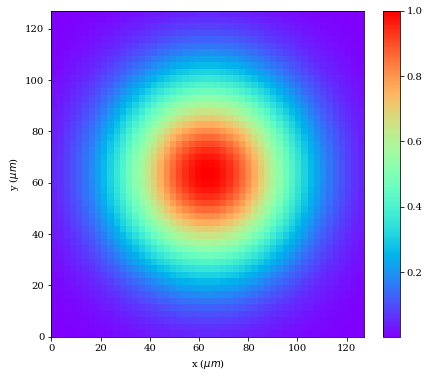

In [27]:
Ns = [8, 8]

def ne_fun(r):
    x_ = r[0] - np.floor(r[0]/X_p)*X_p
    x_ += (x_ < 0)*X_p
    y_ = r[1] - np.floor(r[1]/Y_p)*Y_p
    y_ += (y_ < 0)*Y_p
    assert np.all(x_>=0) and np.all(x_<X_p)
    assert np.all(y_>=0) and np.all(y_<Y_p)
    return n_e_max*np.exp(-n_e_x_decay_rate**2*(x_ - n_e_x_center)**2)\
            *np.exp(-n_e_y_decay_rate**2*(y_ - n_e_y_center)**2)


def get_ne_harmonics(Ns):
    ne_harm_vec = pde_J_FB.getFourierCoeffs(ne_fun, [0.0, 0.0], [X_p, Y_p], Ns)
    return ne_harm_vec


A_mat_list = None
set_k_get_omega = False

def set_matrices_list(kx_i, ky_j, Ns):
    ne_harm_vec = get_ne_harmonics(Ns)
    
    EQ_E_fin = EQ_E_harm_kw.subs([(kx, kx_i), (ky, ky_j)])
    EQ_J_fin = EQ_J_harm_kw.subs([(kx, kx_i), (ky, ky_j)])

    expr_list = [EQ_E_fin, EQ_J_fin]
    vars = [E_tilde, J_tilde]
    pars = [ne_tilde]
    pars_vecs = [ne_harm_vec]
    eig_vars = [omega]
    pde_J_FB.setupNumericalParameters(expr_list, Ns, vars, pars, pars_vecs, eig_vars)
    pde_J_FB.calculateDenseMatrices = True

    A_mat_list = pde_J_FB.orthogonalToNumpyMatrix()
    return A_mat_list

def set_matrices_list_wky0(w_i, Ns):
    ## sets omega to w_i and and ky=0 and looks for kx (i.e. Gamma-X band in a square lattice)
    ## it takes losses into account by solving for a complex k_x
    ne_harm_vec = get_ne_harmonics(Ns)
    
    EQ_E_fin = EQ_E_harm_kw.subs([(omega, w_i), (ky, 0)])
    EQ_J_fin = EQ_J_harm_kw.subs([(omega, w_i), (ky, 0)])

    expr_list = [EQ_E_fin, EQ_J_fin]
    vars = [E_tilde, J_tilde]
    pars = [ne_tilde]
    pars_vecs = [ne_harm_vec]
    eig_vars = [kx]
    pde_J_FB.setupNumericalParameters(expr_list, Ns, vars, pars, pars_vecs, eig_vars)
    pde_J_FB.calculateDenseMatrices = True

    A_mat_list = pde_J_FB.orthogonalToNumpyMatrix()
    return A_mat_list


kx_i = 1.0
ky_j = 0.0
w_i = 1.5
if set_k_get_omega:
    A_mat_list = set_matrices_list(kx_i, ky_j, Ns)
else:
    A_mat_list = set_matrices_list_wky0(w_i, Ns)

figsize(7, 6)

x = np.linspace(0, X_p, 50)
y = np.linspace(0, X_p, 50)
x_mesh, y_mesh = np.meshgrid(x, y, indexing='ij')
ne_mesh = ne_fun([x_mesh, y_mesh])
ne_mesh /= np.max(ne_mesh)


imshow(ne_mesh, cmap="rainbow", extent=[0, pitch, 0, pitch], origin='lower', aspect='auto')
xlabel("x ($\mu m$)")
ylabel("y ($\mu m$)")
colorbar()
savefig('other/periodicGaussian/lattice_127_62.png',  bbox_inches='tight', pad_inches=0.5)
show()



In [28]:
from Electromagnetics import Misc

solver = 'hybr' #'hybr'
handle_overflow = True
maxiter = 100
maxfev = 100
tol = 1.0e-6
tol_abs = False

A_eqs_list = [A_mat_list]


sing_val_tol = 1.0e-5
del_norm = 1.0e-5
sig_small = 1.0e-3j

_N_pp = 10

def get_eig_points(kx_i, ky_j, Ns, _N_pp, A_eqs_list, vbose=False, eigs_prev=[], get_eig_vecs=False):

    _N_2 = Ns[0]#int(Ns[0]/2)

    roots_prev = []
    eig_points_w = []
    eig_vecs_E = []

    for j in range(0, _N_pp+1):
        #eigvar_vals_0 = [j*w_i*np.sqrt(eps_r_sub)]
        eigvar_vals_0 = np.random.rand(1)*3.0#np.sqrt(kx_i**2 + ky_j**2)/np.sqrt(eps_r_sub)
        if j<len(eigs_prev):
            eigvar_vals_0 = [eigs_prev[j] + 0.1]
        if vbose:
            print(eigvar_vals_0)
        res = pde_J_FB.solveDeterminant(eigvar_vals_0, A_eqs_list, solver=solver, handle_overflow=handle_overflow, \
                                      roots_prev=roots_prev, tol=tol, maxiter=maxiter, maxfev=maxfev,\
                                      getMats=True, tol_relative=not tol_abs)

        print('success: ', res[2]['success'])
        w_i = res[0][0]

        if vbose:
            print('k, omega: ', j, (kx_i, ky_j, w_i), np.abs(res[1][0]))
        
        if res[2]['success']:
            #roots_prev.append([w_i])
            eig_points_w.append(w_i)

        if get_eig_vecs:
            A_mat = res[3][0]
            rank, x_nulls, sing_vals = Misc.null(A_mat, rtol=sing_val_tol, forceRank=A_mat.shape[0]-1)
            if not rank==A_mat.shape[0]-1:
                print('rank: ', rank)
                print(sing_vals)
                assert False

            E_j = x_nulls.T[0,0:2*_N_2]/np.linalg.norm(x_nulls.T[0,0:2*_N_2])
            if res[2]['success']:
                eig_vecs_E.append(E_j)
            if not np.linalg.norm(A_mat.dot(x_nulls))/np.linalg.norm(x_nulls)<del_norm and vbose:
                print('|Ax|=', np.linalg.norm(A_mat.dot(x_nulls)), ' |x|=', np.linalg.norm(x_nulls))
                print(res[2])


    return [eig_points_w, eig_vecs_E]

def get_eig_points_wky0(w_i, Ns, _N_pp, A_eqs_list, vbose=False, eigs_prev=[], get_eig_vecs=False):

    _N_2 = Ns[0]#int(Ns[0]/2)

    roots_prev = []
    eig_points_kx = []
    eig_vecs_E = []

    for j in range(0, _N_pp+1):
        #eigvar_vals_0 = [j*w_i*np.sqrt(eps_r_sub)]
        eigvar_vals_0 = np.random.rand(1)*3.14#np.sqrt(kx_i**2 + ky_j**2)/np.sqrt(eps_r_sub)
        if j<len(eigs_prev):
            eigvar_vals_0 = [eigs_prev[j] + 0.1]
        if vbose:
            print(eigvar_vals_0)
        res = pde_J_FB.solveDeterminant(eigvar_vals_0, A_eqs_list, solver=solver, handle_overflow=handle_overflow, \
                                      roots_prev=roots_prev, tol=tol, maxiter=maxiter, maxfev=maxfev,\
                                      getMats=True, tol_relative=not tol_abs)

        print('success: ', res[2]['success'])
        kx_i = res[0][0]

        if vbose:
            print('k, omega: ', j, (kx_i, w_i), np.abs(res[1][0]))
        
        if res[2]['success']:
            #roots_prev.append([kx_i])
            eig_points_kx.append(kx_i)

        if get_eig_vecs:
            A_mat = res[3][0]
            rank, x_nulls, sing_vals = Misc.null(A_mat, rtol=sing_val_tol, forceRank=A_mat.shape[0]-1)
            if not rank==A_mat.shape[0]-1:
                print('rank: ', rank)
                print(sing_vals)
                assert False

            E_j = x_nulls.T[0,0:2*_N_2]/np.linalg.norm(x_nulls.T[0,0:2*_N_2])
            if res[2]['success']:
                eig_vecs_E.append(E_j)
            if not np.linalg.norm(A_mat.dot(x_nulls))/np.linalg.norm(x_nulls)<del_norm and vbose:
                print('|Ax|=', np.linalg.norm(A_mat.dot(x_nulls)), ' |x|=', np.linalg.norm(x_nulls))
                print(res[2])


    return [eig_points_kx, eig_vecs_E]


if set_k_get_omega:
    [eig_points_w, eig_vecs_E] = get_eig_points(kx_i, ky_j, Ns, _N_pp, A_eqs_list, vbose=True)
    print(eig_points_w)
else:
    [eig_points_kx, eig_vecs_E] = get_eig_points_wky0(w_i, Ns, _N_pp, A_eqs_list, vbose=True)
    print(eig_points_kx)
    
    

[1.35020139]


/home/nima/Documents/GitProjects/myPyCodes/Electromagnetics/FourierBlochND.py:1843: OptimizeWarning: Unknown solver options: maxiter, ftol
  options={'maxfev':maxfev, 'maxiter':maxiter, 'ftol': ftol})
/home/nima/Documents/GitProjects/myPyCodes/Electromagnetics/FourierBlochND.py:1816: RuntimeWarning: overflow encountered in exp
  det_ = np.exp(log_dets_[i])


success:  True
k, omega:  0 ((2.4355342427708284+0.504501970867686j), 1.5) 1.8319910239396706e-09
[0.21715553]
success:  True
k, omega:  1 ((-2.4355341905603822-0.5045019462468311j), 1.5) 1.2240787554212214e-12
[1.07546794]
success:  True
k, omega:  2 ((2.4355342420093757+0.5045019701754291j), 1.5) 3.0163484131480573e-12
[2.17742053]
success:  True
k, omega:  3 ((2.435534242028943+0.5045019701881441j), 1.5) 5.03453662407761e-11
[0.97711849]
success:  True
k, omega:  4 ((-2.435534190562627-0.5045019462521186j), 1.5) 2.7286001258775336e-13
[1.73918105]
success:  True
k, omega:  5 ((2.435534134920188+0.5045019537397624j), 1.5) 2.0966330555362053e-07
[2.53645849]
success:  True
k, omega:  6 ((2.4355342426628703+0.5045019698403218j), 1.5) 1.6021593045025082e-09
[0.67149512]
success:  True
k, omega:  7 ((-3.8476511166185516+0.5045019462517515j), 1.5) 5.506239222335968e-13
[2.42832274]
success:  True
k, omega:  8 ((2.4355342425378717+0.5045019690739132j), 1.5) 2.8362121430688542e-09
[2.224576

/home/nima/.local/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


--------------------------------------------------
0 : w =  0.0


/home/nima/Documents/GitProjects/myPyCodes/Electromagnetics/FourierBlochND.py:1843: OptimizeWarning: Unknown solver options: maxiter, ftol
  options={'maxfev':maxfev, 'maxiter':maxiter, 'ftol': ftol})
/home/nima/Documents/GitProjects/myPyCodes/Electromagnetics/FourierBlochND.py:1816: RuntimeWarning: overflow encountered in exp
  det_ = np.exp(log_dets_[i])


success:  False
success:  False
success:  False
success:  False
success:  False
success:  False
success:  False
success:  False
success:  False
success:  False
success:  False
[]
--------------------------------------------------
1 : w =  0.057692307692307696
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
[(0.8791795887241134-1.0261288405882905j), (0.8791795884165028-1.0261288406794455j), (0.8791795884164578-1.0261288399656798j), (0.8791795884156219-1.02612884067458j), (-0.8791795873997772+1.0261288396697532j), (0.8791795103378588-1.026128870637618j), (-0.8791795880786236+1.026128840914555j), (0.8791795880392432-1.0261288410659093j), (0.8791795884559029-1.0261288401422035j), (-0.8791795884532689+1.0261288407817364j), (-0.8791795883976641+1.0261288407634894j)]
--------------------------------------------------
2 : w =  0.11538461538461539
success:  True
success:  True
su

--------------------------------------------------
13 : w =  0.75
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
[(1.1202014198083254-1.8657394905393692j), (-1.1202014292198705+1.86573947371063j), (1.1202014202531658-1.8657394899955524j), (-1.1202014295624887+1.8657394744148608j), (-5.162983882520088-1.865739479876509j), (1.1202014196909365-1.8657394896042514j), (-1.120201429046787+1.8657394740336564j), (-5.162983878581162-1.865739474157599j), (1.1202014202406323-1.8657394899746609j), (-1.1202014285981923+1.8657394741612805j), (-5.162983878579643-1.8657394741505198j)]
--------------------------------------------------
14 : w =  0.8076923076923077
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
[(1.1954707175826786-1.6627132189111318j), (-1.195470693908717

--------------------------------------------------
25 : w =  1.4423076923076923
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
[(-3.6329989051118177+0.628180755257732j), (-2.650186391557179-0.6281807632779047j), (-3.6329989157518567+0.6281807633279913j), (-2.6501863916819435-0.6281807629040436j), (-3.6329989159787743+0.6281807636412798j), (-2.650186391131545-0.628180763651347j), (-2.650186391590877-0.6281807632165454j), (-2.6501863918198527-0.628180763638205j), (-2.650186391897383-0.6281807651842939j), (-3.632998915374184+0.6281807631206572j), (-2.6501863914620594-0.6281807632107385j)]
--------------------------------------------------
26 : w =  1.5
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
[(-2.435534189264264-0.504501946125146j), (-2.4355341898663

--------------------------------------------------
37 : w =  2.1346153846153846
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
[(0.20412629874343458-0.421727715078291j), (-1.6217506819337522+0.8355602335620005j), (1.6217505772088316-0.8355601870722285j), (-1.621750678031717+0.8355602345901059j), (-4.661434629002276-0.8355602345928322j), (1.6217505775018648-0.8355601875980543j), (-1.6217506860955444+0.835560241358437j), (-4.661434629536385-0.835560237700092j), (1.6217505777503458-0.8355601871362938j), (-1.6217506766692493+0.8355602329470297j), (-4.661434624284198-0.8355602320527298j)]
--------------------------------------------------
38 : w =  2.1923076923076925
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
[(0.29109827356959433-0.32211641790001283j), (

--------------------------------------------------
49 : w =  2.826923076923077
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
[(0.11138655427336884-0.17187240095803696j), (-0.11138651860339305+0.17187241262231046j), (0.11138655443598361-0.17187240104720117j), (-0.11138651859189727+0.17187241255595756j), (-6.1717987884917-0.1718724132980131j), (0.11138655427941509-0.1718724009692363j), (-0.11138651858638364+0.17187241258161262j), (-6.17179878874485-0.17187241287140112j), (0.11138655430247674-0.1718724009272227j), (-0.11138651859172088+0.17187241255324082j), (-6.1717987885906584-0.17187241257579575j)]
--------------------------------------------------
50 : w =  2.8846153846153846
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
success:  True
[(0.40580439529918855-0.149919

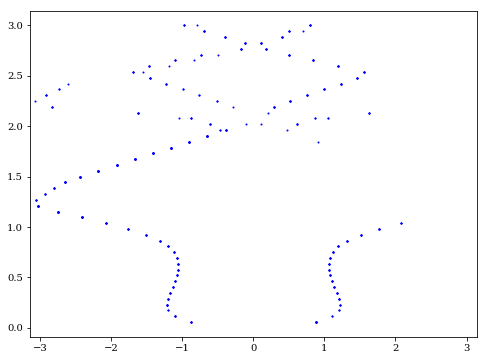

In [30]:
##get dispsion curves

w_pts = []
k_pts = []

if set_k_get_omega:
    kx_max = 2.0*np.pi/X_p
    n_pts = 53

    kx_arr = np.linspace(0.01, kx_max/2, n_pts)
    ky_arr = np.zeros(n_pts)

    eig_points_w_prev = []
    figsize(8, 6)

    for i in range(n_pts):
        kx_i = kx_arr[i]
        ky_i = ky_arr[i]
        A_mat_list = set_matrices_list(kx_i, ky_i, Ns)
        A_eqs_list = [A_mat_list]

        print('-'*50)
        print(i, ": k = " , (kx_i, ky_i))
        [eig_points_w, eig_vecs_E] = get_eig_points(kx_i, ky_i, Ns, _N_pp, A_eqs_list, vbose=False, eigs_prev=eig_points_w_prev)
        print(eig_points_w)
        eig_points_w_real = np.real(eig_points_w)
        for j in range(len(eig_points_w)):
            if len(eig_points_w_prev)==0:
                eig_points_w_prev.append(eig_points_w[j])
            elif np.min(np.abs(np.array(eig_points_w_prev) - eig_points_w[j])) > 0.1:
                eig_points_w_prev.append(eig_points_w[j])
        plot([kx_i]*len(eig_points_w), eig_points_w_real, 'bo', markersize = 1)

        k_pts.extend([kx_i]*len(eig_points_w))
        w_pts.extend(eig_points_w_real.tolist())

    #xlim(-np.pi/X_p, np.pi/X_p)
    #ylim(0, 3)
    show()
else:
    w_min = 0.0
    w_max = 3.0
    n_pts = 53

    w_arr = np.linspace(w_min, w_max, n_pts)

    eig_points_k_prev = []
    figsize(8, 6)

    for i in range(n_pts):
        w_i = w_arr[i]
        A_mat_list = set_matrices_list_wky0(w_i, Ns)
        A_eqs_list = [A_mat_list]

        print('-'*50)
        print(i, ": w = " , w_i)
        [eig_points_k, eig_vecs_E] = get_eig_points_wky0(w_i, Ns, _N_pp, A_eqs_list, vbose=False, eigs_prev=eig_points_k_prev)
        print(eig_points_k)
        eig_points_k_real = np.real(eig_points_k)
        for j in range(len(eig_points_k)):
            if len(eig_points_k_prev)==0:
                eig_points_k_prev.append(eig_points_k[j])
            elif np.min(np.abs(np.array(eig_points_k_prev) - eig_points_k[j])) > 0.1:
                eig_points_k_prev.append(eig_points_k[j])
        plot(eig_points_k_real, [w_i]*len(eig_points_k), 'bo', markersize = 1)

        k_pts.extend(np.array(eig_points_k).tolist())
        w_pts.extend([w_i]*len(eig_points_k))

    xlim(-np.pi/X_p, np.pi/X_p)
    #ylim(0, 3)
    show()


In [32]:
import os
file_no = 0

write = "y"
filename = 'other/periodicGaussian/square_127_62_GX_w_loss_no{}'.format(file_no)

#plot(k_pts, np.real(np.array(w_pts)), 'bo', markersize=1)
if os.path.exists(filename +'.npz'):
    #global write
    write = input("file will be overwritten. Sure (y/n)?")
if write == "y":
    np.savez(filename, w_pts=w_pts, k_pts=k_pts)
    print("wrote to {}.npz'".format(filename))

wrote to other/periodicGaussian/square_127_62_GX_w_loss_no0.npz'


loading  other/periodicGaussian/square_127_62_GX_w_loss_no0.npz
572


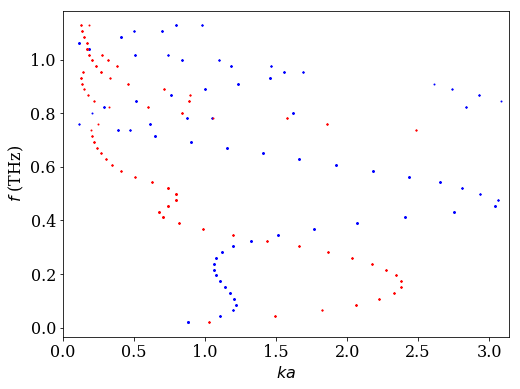

In [36]:
font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)

convert_to_si = True

for i in range(1):
    filename = 'other/periodicGaussian/square_127_62_GX_w_loss_no{}.npz'.format(i)
    print("loading ", filename)
    data = np.load(filename)
    w_pts_ = np.array(data['w_pts'])
    k_pts_ = np.array(data['k_pts'])
    
    if convert_to_si:
        w_pts_ *= (constants.c/(pitch*constants.micro))#/np.sqrt(eps_r_sub)
        #k_pts_ *= (2.0*np.pi/(pitch*constants.micro))
    
    print(len(w_pts))
    #print(k_pts)

    plot(np.real(k_pts_), np.real(np.array(w_pts_)/(2.0*np.pi)/constants.tera), 'bo', markersize=1)
    plot(-np.real(k_pts_), np.real(np.array(w_pts_)/(2.0*np.pi)/constants.tera), 'bo', markersize=1)
    plot(np.imag(k_pts_), np.real(np.array(w_pts_)/(2.0*np.pi)/constants.tera), 'ro', markersize=1)
    #plot(-np.imag(k_pts_), np.real(np.array(w_pts_)/(2.0*np.pi)/constants.tera), 'ro', markersize=1)
    

xlabel('$ka$')
ylabel("$f$ (THz)")
xlim(0, np.pi)
savefig('other/periodicGaussian/bands_127_62_GX_r.png',  bbox_inches='tight', pad_inches=0.5)
show()

In [42]:
2.0*np.pi*constants.c/(pitch*constants.micro)/constants.tera


14.83190210479412

In [54]:
constants.c/(1*constants.tera)/np.sqrt(11.7)/2/constants.micro

43.82256323611096